In [1]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier,RidgeClassifier,PassiveAggressiveClassifier
import pickle
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import collections as ct
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
input_df = pd.read_csv('junk_clean_repeated_chunks_removed_all.csv')

In [3]:
from autocorrect import spell
print(input_df["New_Symptom"][3])
print("\n--------\n")

spell_correct = []
c = str(input_df["New_Symptom"][3]).split()
for i in c:
    spell_correct.append(spell(i))
    
print(spell_correct)

Could you please send me all my payslips from March 2017 until now + my P60 please?
I can see my payslips and my P60, when I click on the link, it says downloading but I get a message "couldn't open PDF".
I click on pay, then payslip, and I see "You receive a paper copy of payslips".
I haven't receive any payslip at home and I don't have any pdf.

--------

['Could', 'you', 'please', 'send', 'me', 'all', 'my', 'payslips', 'from', 'March', '2017', 'until', 'now', 'a', 'my', 'Put', 'please', 'I', 'can', 'see', 'my', 'payslips', 'and', 'my', 'P60,', 'when', 'I', 'click', 'on', 'the', 'links', 'it', 'says', 'downloading', 'but', 'I', 'get', 'a', 'message', '"couldn\'t', 'open', 'PDF".', 'I', 'click', 'on', 'pay', 'then', 'payslip', 'and', 'I', 'see', 'You', 'receive', 'a', 'paper', 'copy', 'of', 'payslips".', 'I', 'havenet', 'receive', 'any', 'payslip', 'at', 'home', 'and', 'I', 'dont', 'have', 'any', 'PDF']


In [4]:
no_features = 100
tf_vectorizer = CountVectorizer(max_df=0.75, min_df=20, ngram_range=(2,3), max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(input_df['New_Symptom'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
print(len(tf_feature_names))
weights = np.asarray(tf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tf_feature_names, 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(30)

100


,term,weight
53,let know,0.041005
42,heatsoftware com,0.037204
48,ivanti com,0.023297
41,heat software,0.022179
31,error message,0.020793
30,email address,0.019720
61,need access,0.019273
73,reset password,0.015248
56,looks like,0.014935
35,following error,0.012700


In [6]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [7]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 3
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=50, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
let know,heatsoftware com,ivanti com,email address,need access
Topic 1:
heat software,following error,change password,webex com,need able
Topic 2:
error message,looks like,service request,expense report,getting error


In [7]:
x = lda.transform(tf)
y = x.argmax(axis=1)
b = pd.DataFrame(y,columns=["Topic"])
b.Topic.value_counts()
#pd.crosstab(input_df.ActualService, b.topic, margins=1)

0    15219
5     1133
7      971
8      948
3      825
2      734
9      727
4      633
1      612
6      561
Name: Topic, dtype: int64

In [84]:
pd.crosstab(input_df.OwnerTeam, b.topic)

topic,0,1,2,3,4,5,6,7,8,9
OwnerTeam,,,,,,,,,,
Application Development,1677,60,82,95,26,261,67,159,90,36
Business Applications,932,14,34,43,28,101,25,61,52,96
Business Intelligence,100,3,3,5,0,12,2,3,6,1
Business Support,42,3,0,2,3,3,0,1,2,1
DevOps/100%,164,3,0,4,14,16,6,10,9,5
Facilities / Operations,21,0,0,2,0,1,1,0,1,1
Global DevOps,20,1,0,0,0,3,0,1,0,0
IT,78,3,5,1,3,5,3,6,4,0
Infrastructure Support,2620,61,128,129,115,147,93,134,138,88


In [8]:
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=1)
model.fit(tf)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='\t')
    for ind in order_centroids[i, :5]:
        print('%s' % terms[ind], end=',')
    print()

Top terms per cluster:
Cluster 0:	let know,heatsoftware com,heat software,know need,let know need,
Cluster 1:	heatsoftware com,ivanti com,error message,need access,email address,
Cluster 2:	webex com,heatsoftware webex com,heatsoftware webex,com site,com account,


<class 'pandas.core.frame.DataFrame'>


<Container object of 10 artists>

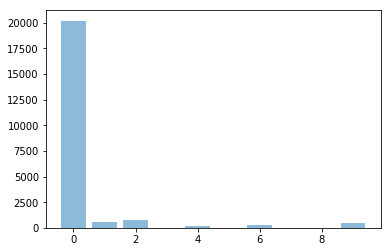

In [9]:
k_labels = model.labels_
from scipy.stats import itemfreq
a = pd.DataFrame(itemfreq(k_labels))
print(type(a))
plt.bar(a[0], a[1], align='center', alpha=0.5)

In [11]:
input_df.ActualService.value_counts()

Service Desk                         13858
Application Development Service       2348
Server Administration                 1156
IT General Administration              782
Desktop Service                        744
Email Service                          521
Network Service                        450
Employee Administration                448
Communications Services                297
Mail Service                           187
Enterprise Application Services        177
Business Analytics Service             167
Domain Migration                       166
OKTA                                   147
Enterprise Application Service         115
Integration Services                   104
Web Conferencing                       103
WebEx                                   99
Mobile Communication                    95
Ivanti 100%                             81
Data Service                            74
BitLocker                               63
Facilities Management                   50
Printing Se

In [10]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation


In [11]:
db = DBSCAN(eps=0.3, min_samples=10).fit(tf)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [12]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [13]:
print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tf, labels))

Estimated number of clusters: 103
Silhouette Coefficient: 0.788


In [14]:
from scipy.stats import itemfreq
itemfreq(labels)

array([[   -1,  3094],
       [    0, 14387],
       [    1,    20],
       [    2,    24],
       [    3,   170],
       [    4,    33],
       [    5,    61],
       [    6,    38],
       [    7,    18],
       [    8,    71],
       [    9,    39],
       [   10,    46],
       [   11,    26],
       [   12,    75],
       [   13,    51],
       [   14,    85],
       [   15,   152],
       [   16,   101],
       [   17,    45],
       [   18,    48],
       [   19,    34],
       [   20,    40],
       [   21,    13],
       [   22,    37],
       [   23,    37],
       [   24,    39],
       [   25,    39],
       [   26,    94],
       [   27,    36],
       [   28,   136],
       [   29,    47],
       [   30,    62],
       [   31,    52],
       [   32,    34],
       [   33,    76],
       [   34,    40],
       [   35,   249],
       [   36,   204],
       [   37,    31],
       [   38,    65],
       [   39,   103],
       [   40,    24],
       [   41,    42],
       [   

In [45]:
clus1 = input_df[labels == 0]
clus1.shape

(7127, 7)

In [34]:
for i in clus1.New_Symptom:
    print(i)
    print("\n---------\n")

 Subject: RE: Consolidated list of connectivity issues on the new office network
 Subject: RE: Consolidated list of connectivity issues on the new office network
 Could you let me know what the dns servers are for domains plhost.global, qaplhost.local and devplhost.content.local? This way I can add related dns conditional forwarders on LD DCs. Thanks.
 Subject: RE: Consolidated list of connectivity issues on the new office network
For issue 3, we are not able to reach lum-prx.lumension.com on port 8088, and our EMSS agent is now Online: 
For issues 1 and 4, the internal DNS issues, we would wait for Jeremy or Link to add in the relevant DNS records when they are back.
In the meantime, we are making do with adding the entries on the hosts file on our machines.
 Subject: Re: Consolidated list of connectivity issues on the new office network
Hey Jeremy, I have been assisting the guys over in Singapore to get things up and running for their new office. Can you assist us with line items 1 a

In [15]:
af = AffinityPropagation(preference=-50).fit(tf)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_

n_clusters_af = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_af)

KeyboardInterrupt: 